In [1]:
import pickle
import sys, os, argparse
import numpy as np
import ase
import ase.io
import json
import tqdm
import math
from nice.blocks import *
from nice.utilities import *
from matplotlib import pyplot as plt
from sklearn.linear_model import BayesianRidge

ouputpickle = pickle.load(open("out.pickle", "rb"))

grid = [150, 200, 350, 500, 750, 1000, 1500, 2000, 3000, 5000, 7500,
        10000]  #for learning curve

train_features = ouputpickle["features"]
test_features = ouputpickle["testfeatures"]
train_energies = ouputpickle["energies"]
test_energies = ouputpickle["testenergies"]

def get_rmse(first, second):
    return np.sqrt(np.mean((first - second)**2))


def get_standard_deviation(values):
    return np.sqrt(np.mean((values - np.mean(values))**2))


def get_relative_performance(predictions, values):
    return get_rmse(predictions, values) / get_standard_deviation(values)


def estimate_performance(regressor, data_train, data_test, targets_train,
                         targets_test):
    regressor.fit(data_train, targets_train)
    return get_relative_performance(regressor.predict(data_test), targets_test)

errors = []
for el in tqdm.tqdm(grid):
    errors.append(
        estimate_performance(BayesianRidge(), train_features[:el],
                             test_features, train_energies[:el],
                             test_energies))

100%|██████████| 12/12 [1:18:14<00:00, 391.17s/it]


In [2]:
print(errors)

[0.3164990747052852, 0.3109062683329022, 0.2630345861169582, 0.21141443281045094, 0.16137838019141632, 0.15651956475159803, 0.1295782875990591, 0.1132845827673693, 0.09571975390426453, 0.08362241120160967, 0.07257466198171098, 0.07012857997433651]


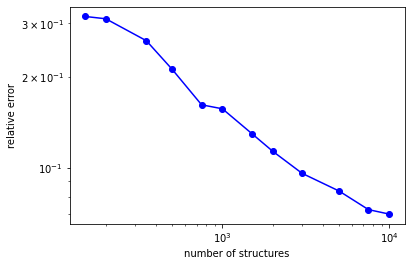

In [3]:
from matplotlib import pyplot as plt
plt.plot(grid, errors, 'bo')
plt.plot(grid, errors, 'b')
plt.xlabel("number of structures")
plt.ylabel("relative error")
plt.xscale('log')
plt.yscale('log')
plt.show()